# Exploratory Data Analysis

In this section, we conduct exploratory data analysis (EDA) to gain insights into our dataset.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ratings_cleaned.csv')
df.head()

,movieId,userId,rating
0,42594,0,6.0
1,42594,1,5.0
2,65891,2,7.0
3,11202,3,9.0
4,11202,4,9.0


In [3]:
num_users = len(df['userId'].unique())
num_items = len(df['movieId'].unique())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 11674
Unique number of movies in the dataset: 5243


### Ratings distribution

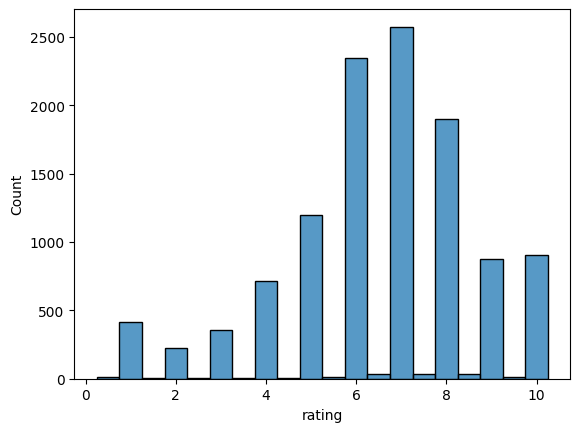

In [5]:
sn.histplot(data=df, x=df['rating'], bins=20, binrange=[0.25,10.25])
plt.show()

We can see that most of the ratings in the data are 6.0, 7.0 and 8.0. It means that most of the movies are good.

### Ratings Distribution By Movie

In [11]:
# get rating frequency
movies_count_df = pd.DataFrame(df.groupby('movieId').size(), columns=['count'])
movies_count_df.reset_index().sort_values(by='count', ascending=False)

,movieId,count
4193,414906,18
3807,284054,17
4687,577922,16
4618,545611,16
4271,436270,16
...,...,...
3178,65157,1
3179,65158,1
3180,65596,1
3181,65754,1


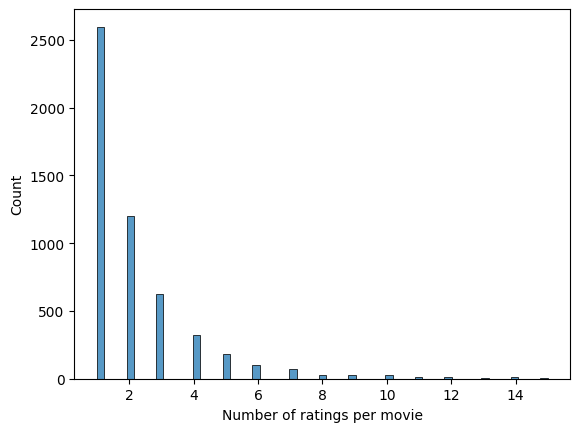

In [8]:
# plot rating frequency of all movies
data = df.groupby('movieId').count()
sn.histplot(data=data, x=data['rating'], binrange=[1,15])
plt.xlabel('Number of ratings per movie')
plt.show()


Most of the movies in the data recieved less than 5 ratings, and very few movies have  many ratings, although the most rated movie '414906' recieved 18 ratings.

### Ratings Distribution By User

In [17]:
data = df.groupby('userId').count()
data.describe()

,movieId,rating
count,11674.0,11674.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


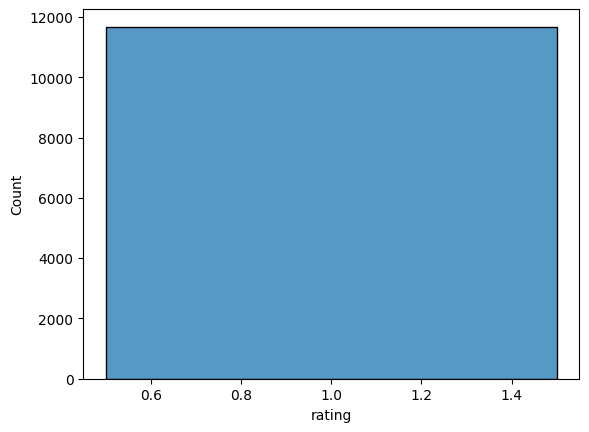

In [21]:
sn.histplot(data=data, x=data['rating'])
plt.show()

In [135]:
df.groupby('userId')['rating'].count().reset_index().sort_values('rating')

,userId,rating
0,0,1
7777,7777,1
7778,7778,1
7779,7779,1
7780,7780,1
...,...,...
3894,3894,1
3895,3895,1
3896,3896,1
3898,3898,1


It means that each user has only provided one rating.

## Conclusions

1. **Sparse Data**: Recommender systems typically rely on user-item interactions to learn patterns and make predictions. When users have provided only one rating, the data becomes extremely sparse, making it harder for the system to identify meaningful correlations and patterns.

2. **Cold Start Problem**: The cold start problem occurs when the system lacks sufficient data about new users or items to make accurate recommendations. In this scenario, where each user has provided only one rating, the system struggles to generate personalized recommendations for new users since there isn't enough information to understand their preferences.

3. **Limited Item Coverage**: With only one rating per user, the system may not have enough data to effectively capture the diversity of items in the dataset. This can result in limited coverage of items in the recommendations, leading to less diverse and potentially less relevant suggestions.

4. **Difficulty in Model Training**: Many recommendation algorithms rely on data from multiple users and items to train their models effectively. With only one rating per user, it becomes challenging to train models that generalize well to unseen data and make accurate predictions.

5. **Bias and Noise**: The single ratings provided by users may be influenced by various factors such as mood, context, or random noise. This can introduce bias and noise into the data, making it harder for the recommender system to distinguish between genuine preferences and random fluctuations.

To address these challenges, techniques such as collaborative filtering with regularization, content-based filtering, and hybrid approaches that combine different recommendation strategies can be employed. Additionally, active learning methods and strategies for encouraging users to provide more ratings can help alleviate the data sparsity issue and improve the performance of the recommender system.

In this project, we will explore a vector database to embed movie features for cold starting our web application. 